# DataYoink

###### Import necessary modules/packages

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
matplotlib.rcParams.update({'font.size': 26})
%matplotlib inline
%matplotlib notebook

import ipywidgets as wdg

import pandas as pd
import numpy as np
import math

import os
import requests

## Once you run the cell below, in the plot area, use your mouse to click on the following:
 
* 1.) Origin 
* 2.) X-axis max 
* 3.) Y-axis max
 
## Notes:
* Be careful not to accidentally add extra clicks, in the case you do, re-run the cell
* Do your best to get your clicks as close to the corners as possible (edit figure size if it helps)
* Below the plot, there is a textbox named "event:" where, everytime you click on the image, a event is captured at the position where you clicked your mouse on the image, verify there is only 3 points selected (scroll down before you start clicking)
* Use the horizontal scroll bar below the image if part of your plot is cut-off

<IPython.core.display.Javascript object>


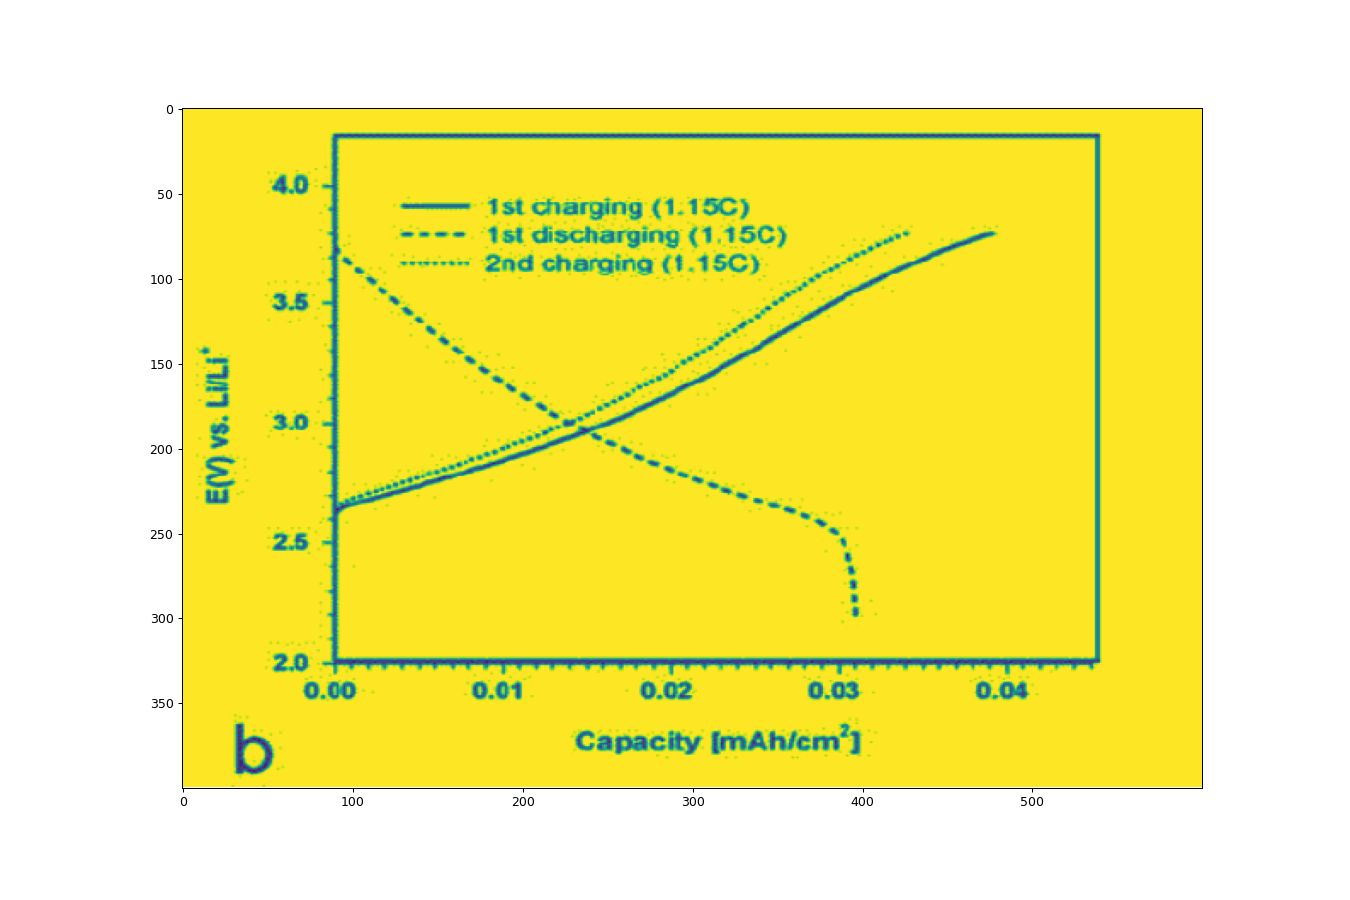

Textarea(value='', description='event:', placeholder='')

please select


In [4]:
# Initialize array of x and y pixels
x = []
y = []


# Load in a discharge curve
img = mpimg.imread('examples/discharge_curve (11).png')
fig = plt.figure(figsize=(15,10))
plt.imshow(img)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False)
display(txt)
print("please select")

# Function to record mouse click events
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above
    # Create an hard reference to the callback not to be cleared by the garbage collector
    x.append(event.xdata)
    y.append(event.ydata)
ka = fig.canvas.mpl_connect('button_press_event', onclick)


In [5]:
# print x and y event clicks
print(x)
print(y)

[88.87637744535849, 536.264162581488, 88.87637744535849]
[324.67476085356884, 322.46725533480503, 15.623988226637266]


###### Round the mouse click events to nearest 10 integer

In [6]:
xpixels = [round(num, -1) for num in x]
ypixels = [round(num, -1) for num in y]

In [7]:
xpixels

[90.0, 540.0, 90.0]

In [8]:
ypixels

[320.0, 320.0, 20.0]

In [9]:
print("the x coordinates are", xpixels)
print("the y coordinates are", ypixels)

the x coordinates are [90.0, 540.0, 90.0]
the y coordinates are [320.0, 320.0, 20.0]


In [10]:
userpoints = np.column_stack( (xpixels, ypixels) )

In [11]:
print(userpoints)

[[ 90. 320.]
 [540. 320.]
 [ 90.  20.]]


In [12]:
def pointclassifier(userpoints):
    
    origin = []
    xaxismax = []
    yaxismax = []
    
    for i in range(len(userpoints)):

        ## origin
        if userpoints[i,0] == min(userpoints[:,0]) and userpoints[i,1] == max(userpoints[:,1]):
            print(userpoints[i,:], "is the pixel location of the origin")
            origin = userpoints[i,:]
    
        ## x max
        elif userpoints[i,0] == max(userpoints[:,0]):
            print(userpoints[i,:], "is the pixel location of the x-axis max")
            xaxismax = userpoints[i,:]
        
        ## y max point
        elif userpoints[i,0] == min(userpoints[:,0]) and userpoints[i,1] == min(userpoints[:,1]):
            print(userpoints[i,:], "is the pixel location of the y-axis max")
            yaxismax = userpoints[i,:]
        
        else:
            print(userpoints[i,:],"This point cannot be classified as one of the following: \n*Origin \n*X-coordinate max \n*y-coordinate max")
            break
    
    return origin, xaxismax, yaxismax

In [13]:
pointclassifier(userpoints)

[ 90. 320.] is the pixel location of the origin
[540. 320.] is the pixel location of the x-axis max
[90. 20.] is the pixel location of the y-axis max


(array([ 90., 320.]), array([540., 320.]), array([90., 20.]))

In [14]:
origin, xaxismax , yaxismax = pointclassifier(userpoints)

[ 90. 320.] is the pixel location of the origin
[540. 320.] is the pixel location of the x-axis max
[90. 20.] is the pixel location of the y-axis max


In [15]:
origin

array([ 90., 320.])

In [16]:
xaxismax

array([540., 320.])

In [17]:
yaxismax

array([90., 20.])

In [18]:
## y coordinate in origin, is the same as y coordinate in xmax 
math.isclose(origin[1], xaxismax[1],  abs_tol=0.1) 

## x coordinate in origin, is the same as x coordinate in ymax 
math.isclose(origin[0], yaxismax[0],  abs_tol=0.1) 

True

###### User picks range of x and y on the axes

<IPython.core.display.Javascript object>


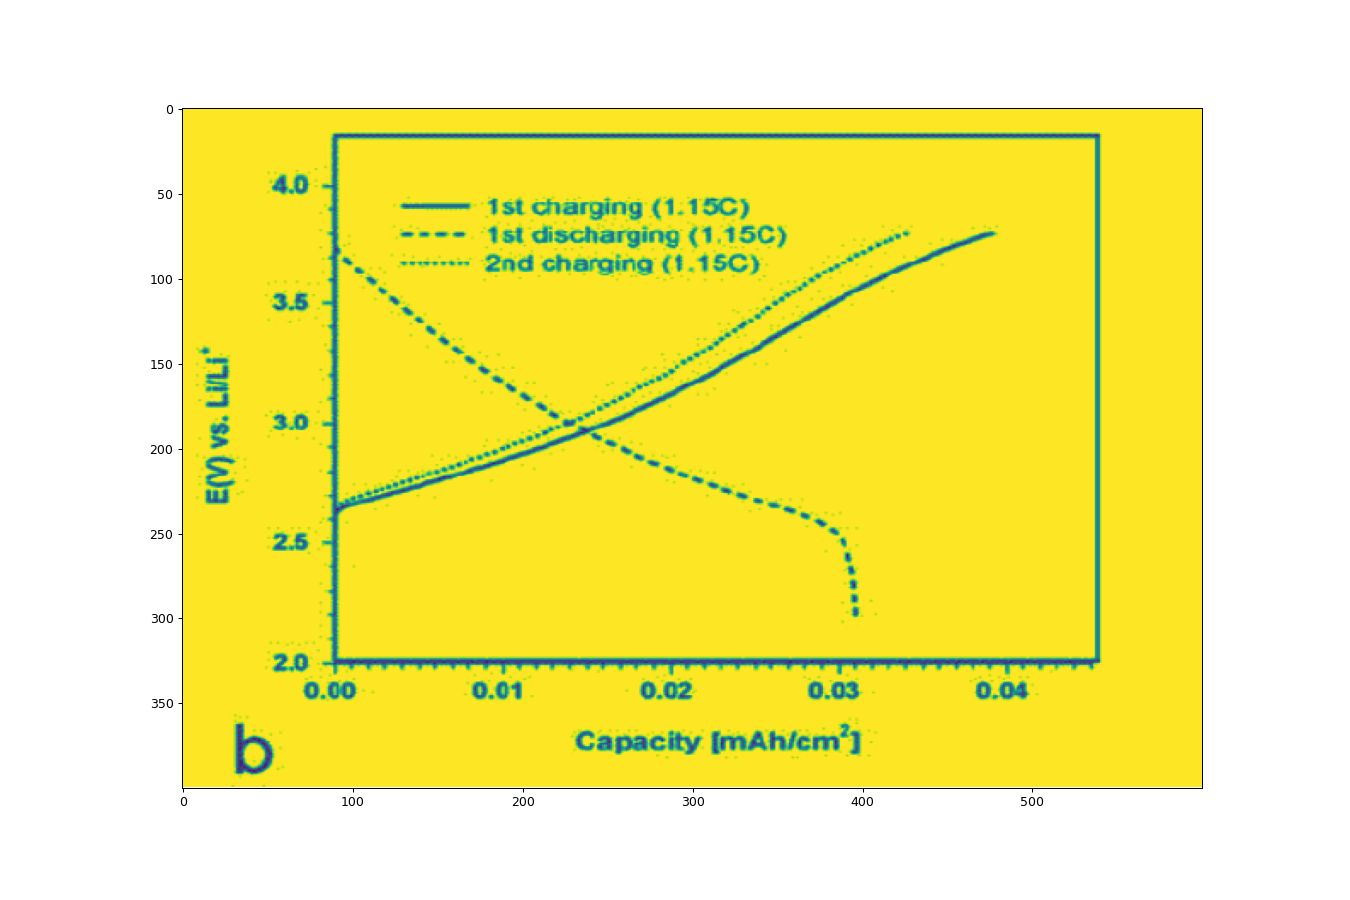

In [19]:
fig = plt.figure(figsize=(15,10))
plt.imshow(img)

In [25]:
xcoordinatemin = float(input("Enter the x min value on the x-axis:"))
xcoordinatemax = float(input("Enter the x max value on the x-axis:"))


assert type(xcoordinatemin) == float, 'User input for the min X value on the x-axis is not the correct datatype'
assert type(xcoordinatemin) == float, 'User input for the max X value on the y-axis is not the correct datatype'
assert xcoordinatemin < xcoordinatemax, 'The min X value on the x-axis is greater than the max X value on the x-axis'

Enter the x min value on the x-axis:0
Enter the x max value on the x-axis:float


ValueError: could not convert string to float: 'float'

In [23]:
ycoordinatemin = float(input("Enter the y min value on the y-axis:"))
ycoordinatemax = float(input("Enter the y max value on the y-axis:"))

assert type(ycoordinatemin) == float, 'User input for the min Y value on the y-axis is not the correct datatype'
assert type(ycoordinatemin) == float, 'User input for the max Y value on the y-axis is not the correct datatype'
assert ycoordinatemin < ycoordinatemax, 'The min Y value on the y-axis is greater than the max Y value on the y-axis'

Enter the y min value on the y-axis:2.0
Enter the y max value on the y-axis:4.5


In [ ]:
print("the range of the x-axis is", "(", xcoordinatemin, ",", xcoordinatemax, ")")
print("the range of the y-axis is", "(", ycoordinatemin, ",", ycoordinatemax, ")")

##### User selecting units of x and y axes

In [ ]:
from ipywidgets import ToggleButtons

xunits = ToggleButtons(options=['Cycle Number', 'Voltage (V)'])
yunits = ToggleButtons(options=['Capacity (mAh g^-1)', 'Coulombic Efficiency (%)', 'Differential Capacity (Ah g^-1 V^-1)'])

In [ ]:
xunits

In [ ]:
yunits

In [ ]:
print("You have selected your x-axis units as:", xunits.value, "\nYou have selected your y-axis units as:", yunits.value)

In [ ]:
img.shape

In [ ]:
img = img[150:1060, int(yaxismax[1]):int(origin[1])]

In [ ]:
fig = plt.figure()
plt.imshow(img)

In [ ]:
int(origin[0])

In [ ]:
int(xaxismax[0])

In [ ]:
img = img[0:452, 0:1000]

In [ ]:
fig = plt.figure()
plt.imshow(img)

In [ ]:
img_cropped = img[77:141, 57:121, :]

In [ ]:
int(origin[0])

In [ ]:
xaxismax[0]

In [ ]:
from PIL import Image 
  
# Opens a image in RGB mode 
im = Image.open('plot.jpg') 

In [ ]:
im.show('plot.jpg')

In [ ]:
def DataYoink(image, xcoordinatemin, xcoordinatemax, ycoordinatemin, ycoordinatemax):

### Import the pre-trained Neural Network and Make Predictions

In [ ]:
# Download the pickle file and input its path
pickel_file_path = "" 
# Load the pretrained discharge curve predictor
predictor = load_trained_nn(pickel_file_path)
# Transform image into acceptable shape

# Predict Discharge curve mask
predict_discharge_curve(PNG_image)